In [1]:
# Name :- lUXSHAN S.
# Index No :- 190364C
# Github Link :- https://github.com/luxshan21/Image_Processing_Works_190364C.git

In [2]:
# Question 1 (a)



In [3]:
# Question 1 (b)



In [4]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
# np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r /16
t = np.random.uniform(0 , 2*np.pi , half_n)
n = s*np.random.randn(half_n)
x , y = (r + n)*np.cos(t),(r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n , 1), y.reshape(half_n ,1)))
m, b = -1, 2
x = np.linspace(-12, 12 , half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack ( ( x.reshape(half_n,1), y.reshape(half_n ,1)))
X = np.vstack((X_circ,X_line))




In [5]:
# Question 2



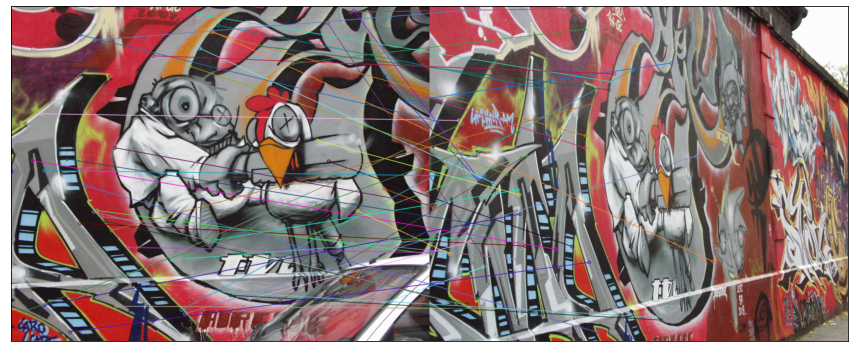

In [12]:
# Question 3 (a)

import cv2 
import matplotlib.pyplot as plt

img1 = cv2.imread('img1.ppm')  
img5 = cv2.imread('img5.ppm') 

img1 = cv2.cvtColor(img1, cv.IMREAD_ANYCOLOR)
img5 = cv2.cvtColor(img5, cv.IMREAD_ANYCOLOR)

sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img5,None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img5, keypoints_2, matches[:50], img5, flags=2)
plt.figure(figsize=(15,15))
plt.imshow(img3)
plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
# Stitch img1.ppm onto img5.ppm

import numpy as np
import cv2 as cv

im1 = cv.imread('img1.ppm', cv.IMREAD_ANYCOLOR)
im2 = cv.imread('img5.ppm', cv.IMREAD_ANYCOLOR)

#Detecting SIFT features
im1gray = cv.cvtColor(im1,cv.COLOR_BGR2GRAY)
im2gray = cv.cvtColor(im2,cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(im1gray,None)
kp2, des2 = sift.detectAndCompute(im2gray,None)

#Matching Features
matcher = cv.BFMatcher()
matches = matcher.knnMatch(des1, des2, k=2)

#Removing bad matches
good_matches = []
for a,b in matches:
    if a.distance < 0.75* b.distance:
        good_matches.append([a])

good_matches = np.asarray(good_matches)

#Draw good matches
imMatch = cv.drawMatchesKnn(im1,kp1,im2,kp2,good_matches,None,flags=2)
cv.imwrite("matches.jpg",imMatch)
cv.namedWindow("Matches", cv.WINDOW_AUTOSIZE)
cv.imshow("Matches", imMatch)
cv.waitKey(0)

#Find the locations of good matches
p1 = np.float32([kp1[i.queryIdx].pt for i in good_matches[:,0]]).reshape(-1,1,2)
p2 = np.float32([kp2[i.trainIdx].pt for i in good_matches[:,0]]).reshape(-1,1,2)

#Find homography
H, mask = cv.findHomography(p1,p2,cv.RANSAC)
print (H)

im2_warped = cv.warpPerspective(im2, np.linalg.inv(H), (1000,1000))
im2_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 2 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 2 Warped", im2_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[-4.32088016e-01 -2.79561853e-01  1.10662462e+02]
 [-8.36211960e-01 -7.18078934e-01  2.76393188e+02]
 [-2.75617359e-03 -2.45271807e-03  1.00000000e+00]]


In [7]:
# Question 3 (b)




In [8]:
# Question 3 (c)


